# Autoregressive Model

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


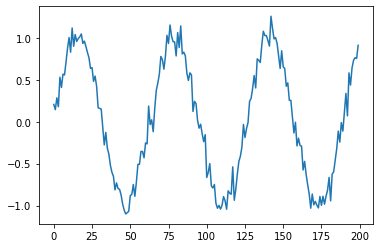

In [3]:
series = np.sin(0.1 * np.arange(200)) + 0.1 * np.random.randn(200)
plt.plot(series)
plt.show()

T = 10
X = []
y = []
for t in range(len(series) - T):
    X.append(series[t:t + T])
    y.append(series[t + T])
X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

Epoch 1/50
3/3 [==============================] - 0s 28ms/step - loss: 0.7734 - val_loss: 0.8161
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.4052 - val_loss: 0.2423
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1490 - val_loss: 0.0613
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0428 - val_loss: 0.0423
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0594 - val_loss: 0.0819
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0793 - val_loss: 0.1220
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0879 - val_loss: 0.0839
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0753 - val_loss: 0.0662
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0509 - val_loss: 0.0346
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0335 - val_loss: 0.0227
Epoch 11/50
3/3 [=====================

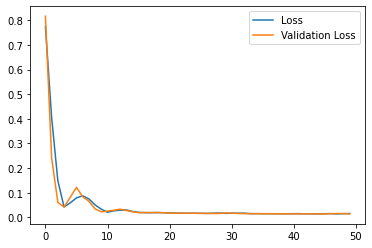

In [4]:
i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Dense(1)(i)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

## One-step forecast

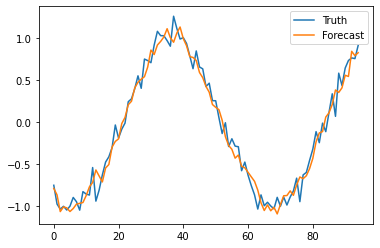

In [5]:
forecast = []
for i in range(len(y_test)):
    p = model.predict(X_test[i].reshape(1, -1))[0, 0]
    forecast.append(p)

plt.plot(y_test, label='Truth')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

## Multi-step forecast

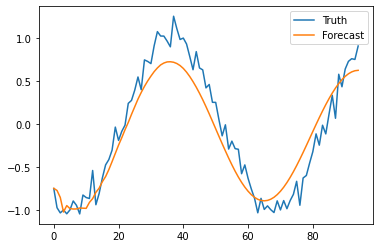

In [6]:
forecast = []
last_x = X_train[-1]
for i in range(len(y_test)):
    p = model.predict(last_x.reshape(1, -1))[0, 0]
    forecast.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(y_test, label='Truth')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()